In [1]:
from lets_plot import *


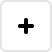
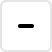
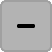
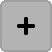
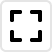
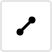
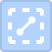
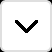
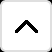
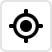
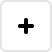
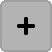
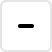
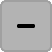
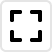
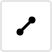
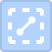
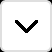
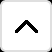
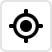

In [2]:
LetsPlot.setup_html()

In [3]:
def dump_plot(plot):
    import json
    from lets_plot._type_utils import standardize_dict
    
    plot_dict = standardize_dict(plot.as_dict())
    plot_json = json.dumps(plot_dict, indent=2)
    print(plot_json)

In [4]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely.geometry import MultiPolygon, Polygon, MultiLineString, LineString, LinearRing, Point, mapping

graticule = GeoDataFrame(
    data = {
        'coord': [
            LineString([(-180, 0), (0, 0), (0, 0), (180, 0)]),

            LineString([(-180, 30), (0, 30)]), LineString([(0, 30), (180, 30)]),
            LineString([(-180, -30), (0, -30)]), LineString([(0, -30), (180, -30)]),
        
            LineString([(-180, 60), (0, 60)]), LineString([(0, 60), (180, 60)]),
            LineString([(-180, -60), (0, -60)]), LineString([(0, -60), (180, -60)]),
        
            LineString([(-180, 90), (0, 90)]), LineString([(0, 90), (180, 90)]),
            LineString([(-180, -90), (0, -90)]), LineString([(0, -90), (180, -90)]),
        
            LineString([(0, -90), (0, 90)]),
            LineString([(30, -90), (30, 90)]),
            LineString([(60, -90), (60, 90)]),
            LineString([(90, -90), (90, 90)]),
            LineString([(120, -90), (120, 90)]),
            LineString([(150, -90), (150, 90)]),
            LineString([(180, -90), (180, 90)]),
        
            LineString([(-30, -90), (-30, 90)]),
            LineString([(-60, -90), (-60, 90)]),
            LineString([(-90, -90), (-90, 90)]),
            LineString([(-120, -90), (-120, 90)]),
            LineString([(-150, -90), (-150, 90)]),
            LineString([(-180, -90), (-180, 90)]),
        ]},
    geometry='coord'
)

def show_map(projection):
    # to set up a projection using a non-public parameter
    from lets_plot.plot.coord import _coord as coord
    
    p = ggplot() + xlim(-180, 180) + ylim(-90, 90)
    return gggrid([
        p + geom_path() + coord('map', projection=projection) + ggtitle('Empty'),
        p + geom_path(map=graticule) + coord('map', projection=projection) + ggtitle('Graticule'),
    ])

## Mercator

In [5]:
show_map('mercator')

## Azimuthal

In [6]:
show_map('azimuthal')

## Conic

In [7]:
show_map('conic')

In [8]:
from lets_plot.geo_data import *

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).


In [9]:
countries = geocode_countries().get_boundaries()

In [10]:
from lets_plot.plot.coord import _coord as coord
ggplot() + xlim(-180, 180) + ylim(-90, 90) + geom_polygon(map=countries) + coord('map', projection='azimuthal')

In [11]:
ggplot() + xlim(-180, 180) + ylim(-90, 90) + geom_polygon(map=countries) + coord('map', projection='robinson')